<a href="https://colab.research.google.com/github/Francisco-Italo/ml2023-Italo-Moraes/blob/master/Atividades/03-KNN/Ativ_knn_fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

## Carregamento dos datasets separadamente e sua concatenação

In [3]:
import pandas as pd

In [4]:
fmnist_train = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
fmnist_test = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

fmnist_dt = pd.concat([fmnist_train, fmnist_test], ignore_index=True)

In [5]:
fmnist_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fmnist_test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [7]:
fmnist_dt

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
69996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
69997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
69998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

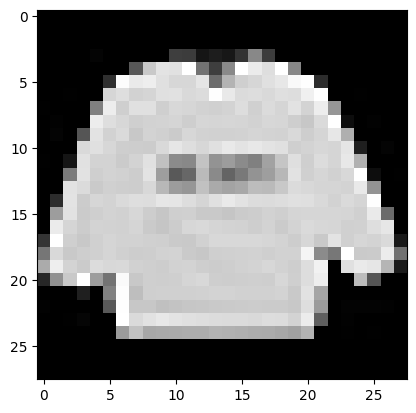

In [9]:
# Imprimindo um objeto do dataset
plt.imshow(fmnist_dt.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

## Separação do dataset em treino, teste e validação, respectivamente na proporção 70:20:10

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

In [11]:
X = fmnist_dt.drop('label', axis=1)
y = fmnist_dt['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train,
test_size=0.1, random_state=84)

In [13]:
print("training data points: {}".format(len(X_train)))
print("validation data points: {}".format(len(X_val)))
print("testing data points: {}".format(len(X_test)))

training data points: 50400
validation data points: 5600
testing data points: 14000


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
kVals = range(1, 32, 2)

for k in kVals: print(k, end=' ')

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 

## Baterias de induções usando diferentes métricas de cálculo de distância e algoritmos de estruturação de dados, com subsequentes validações com o dataset de validação

In [16]:
#Métricas que serão utilizadas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

### Algoritmo: automático / Cálculo: distância euclidiana / Tempo de treino e validação: 6 minutos

In [17]:
accuracies = []

for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(X_val, y_val)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.98%
k=3, accuracy=85.11%
k=5, accuracy=84.88%
k=7, accuracy=85.05%
k=9, accuracy=84.64%
k=11, accuracy=84.39%
k=13, accuracy=84.38%
k=15, accuracy=84.27%
k=17, accuracy=84.27%
k=19, accuracy=84.21%
k=21, accuracy=83.80%
k=23, accuracy=83.80%
k=25, accuracy=83.71%
k=27, accuracy=83.46%
k=29, accuracy=83.38%
k=31, accuracy=83.20%


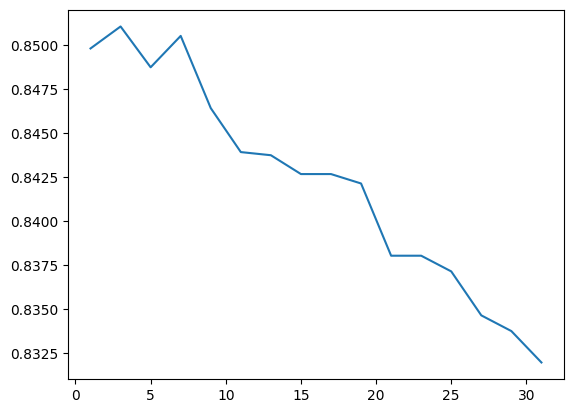

In [18]:
plt.plot(kVals, accuracies)

**Métricas**

In [19]:
bestK = 3
score = model.score(X_test, y_test)
print("k=%d, accuracy=%.2f%%" % (bestK, score * 100))

k=3, accuracy=83.55%


In [20]:
y_pred = model.predict(X_test)

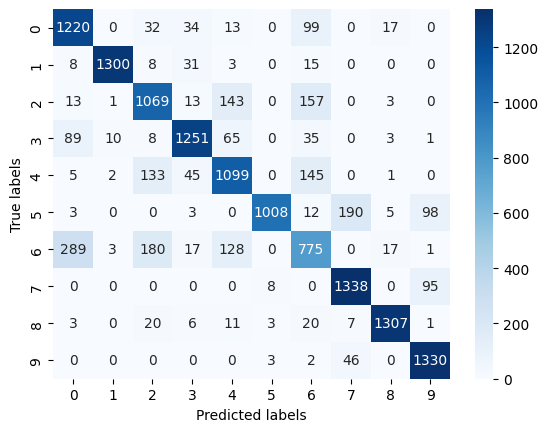

In [21]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

'''
Sumário:

0: Camiseta / top

1: calça

2: Pulôver

3: Vestido

4: Casaco

5: Sandália

6: Camisa

7: Sapatilha

8: Bag

9: Bota no tornozelo
'''
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [22]:
accuracy_score(y_test, y_pred)

0.8355

In [23]:
f1_score(y_test, y_pred, average='micro')

0.8355

In [24]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9845183621035474

### Algoritmo: automático / Cálculo: distância manhattan / Tempo de treino e validação: 1 hora

In [25]:
accuracies = []

for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        model.fit(X_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(X_val, y_val)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=85.80%
k=3, accuracy=85.82%
k=5, accuracy=85.57%
k=7, accuracy=85.62%
k=9, accuracy=85.16%
k=11, accuracy=85.07%
k=13, accuracy=85.16%
k=15, accuracy=84.98%
k=17, accuracy=84.77%
k=19, accuracy=84.61%
k=21, accuracy=84.45%
k=23, accuracy=84.27%
k=25, accuracy=84.14%
k=27, accuracy=84.41%
k=29, accuracy=84.21%
k=31, accuracy=84.14%


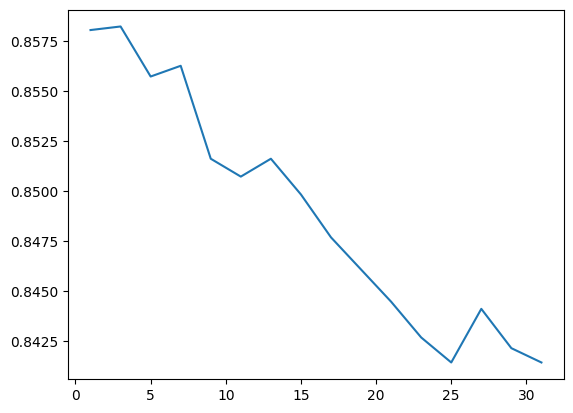

In [26]:
plt.plot(kVals, accuracies)

**Métricas**

In [27]:
bestK = 3
score = model.score(X_test, y_test)
print("k=%d, accuracy=%.2f%%" % (bestK, score * 100))

k=3, accuracy=84.36%


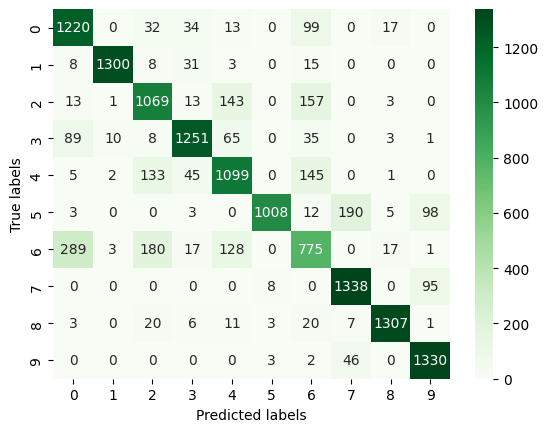

In [28]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

'''
Sumário:

0: Camiseta / top

1: calça

2: Pulôver

3: Vestido

4: Casaco

5: Sandália

6: Camisa

7: Sapatilha

8: Bag

9: Bota no tornozelo
'''
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [29]:
accuracy_score(y_test, y_pred)

0.8355

In [30]:
f1_score(y_test, y_pred, average='micro')

0.8355

In [31]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9845419221765705

### Algoritmo: automático / Cálculo: distância minkowski / Tempo de treino e validação: 6 minutos

In [32]:
accuracies = []

for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
        model.fit(X_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(X_val, y_val)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.98%
k=3, accuracy=85.11%
k=5, accuracy=84.88%
k=7, accuracy=85.05%
k=9, accuracy=84.64%
k=11, accuracy=84.39%
k=13, accuracy=84.38%
k=15, accuracy=84.27%
k=17, accuracy=84.27%
k=19, accuracy=84.21%
k=21, accuracy=83.80%
k=23, accuracy=83.80%
k=25, accuracy=83.71%
k=27, accuracy=83.46%
k=29, accuracy=83.38%
k=31, accuracy=83.20%


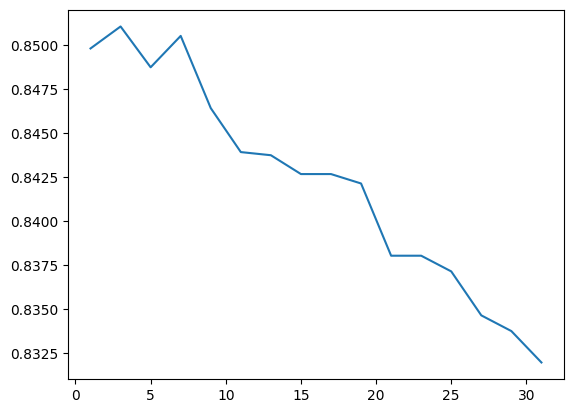

In [33]:
plt.plot(kVals, accuracies)

**Métricas**

In [34]:
bestK = 3
score = model.score(X_test, y_test)
print("k=%d, accuracy=%.2f%%" % (bestK, score * 100))

k=3, accuracy=83.55%


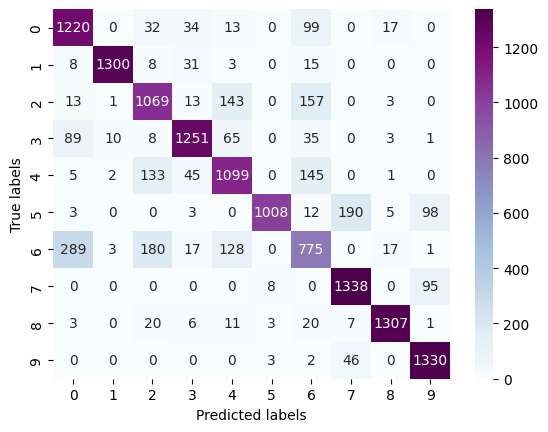

In [35]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

'''
Sumário:

0: Camiseta / top

1: calça

2: Pulôver

3: Vestido

4: Casaco

5: Sandália

6: Camisa

7: Sapatilha

8: Bag

9: Bota no tornozelo
'''
sns.heatmap(cm, annot=True, cmap='BuPu', xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
accuracy_score(y_test, y_pred)

0.8355

In [37]:
f1_score(y_test, y_pred, average='micro')

0.8355

In [38]:
roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

0.9845183621035474